Aplicando algoritmo de ML no dataset CIC2018

testando o dataset que foi treinado com CIC IDS 2017

In [1]:
# !pip install scikit-learn
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from scipy.stats import sem, t
import seaborn as sns

In [ ]:
data = pd.read_csv('path/all_1132_features_mv_entropia_arima_holder_cic2018.csv', low_memory=False)

In [6]:
colunas_para_dropar = [coluna for coluna in data.columns if 'ARIMA' in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_ARIMA_fitted_5', 'Dst Port_ARIMA_resid_5', 'Dst Port_ARIMA_forecast_1', 'Dst Port_ARIMA_forecast_2', 'Dst Port_ARIMA_forecast_3', 'Dst Port_ARIMA_forecast_4', 'Dst Port_ARIMA_forecast_5', 'Flow Duration_ARIMA_fitted_5', 'Flow Duration_ARIMA_resid_5', 'Flow Duration_ARIMA_forecast_1', 'Flow Duration_ARIMA_forecast_2', 'Flow Duration_ARIMA_forecast_3', 'Flow Duration_ARIMA_forecast_4', 'Flow Duration_ARIMA_forecast_5', 'Tot Fwd Pkts_ARIMA_fitted_5', 'Tot Fwd Pkts_ARIMA_resid_5', 'Tot Fwd Pkts_ARIMA_forecast_1', 'Tot Fwd Pkts_ARIMA_forecast_2', 'Tot Fwd Pkts_ARIMA_forecast_3', 'Tot Fwd Pkts_ARIMA_forecast_4', 'Tot Fwd Pkts_ARIMA_forecast_5', 'Tot Bwd Pkts_ARIMA_fitted_5', 'Tot Bwd Pkts_ARIMA_resid_5', 'Tot Bwd Pkts_ARIMA_forecast_1', 'Tot Bwd Pkts_ARIMA_forecast_2', 'Tot Bwd Pkts_ARIMA_forecast_3', 'Tot Bwd Pkts_ARIMA_forecast_4', 'Tot Bwd Pkts_ARIMA_forecast_5', 'TotLen Fwd Pkts_ARIMA_fitted_5', 'TotLen Fwd Pkts_ARIMA_resid_5', 'TotLen Fwd Pk

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,0,36244.0,4434498.0,5.0,4.0,935.0,732.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,59916.0,4367395.0,5.0,4.0,935.0,596.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,443.0,118097840.0,18.0,18.0,865.0,12894.0,232.0,0.0,48.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,59752.0,4555174.0,5.0,3.0,935.0,321.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,37878.0,43546.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [7]:
colunas_para_dropar = [coluna for coluna in data.columns if 'EMA' in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_EMA_3', 'Dst Port_EMA_6', 'Dst Port_EMA_9', 'Dst Port_EMA_12', 'Flow Duration_EMA_3', 'Flow Duration_EMA_6', 'Flow Duration_EMA_9', 'Flow Duration_EMA_12', 'Tot Fwd Pkts_EMA_3', 'Tot Fwd Pkts_EMA_6', 'Tot Fwd Pkts_EMA_9', 'Tot Fwd Pkts_EMA_12', 'Tot Bwd Pkts_EMA_3', 'Tot Bwd Pkts_EMA_6', 'Tot Bwd Pkts_EMA_9', 'Tot Bwd Pkts_EMA_12', 'TotLen Fwd Pkts_EMA_3', 'TotLen Fwd Pkts_EMA_6', 'TotLen Fwd Pkts_EMA_9', 'TotLen Fwd Pkts_EMA_12', 'TotLen Bwd Pkts_EMA_3', 'TotLen Bwd Pkts_EMA_6', 'TotLen Bwd Pkts_EMA_9', 'TotLen Bwd Pkts_EMA_12', 'Fwd Pkt Len Max_EMA_3', 'Fwd Pkt Len Max_EMA_6', 'Fwd Pkt Len Max_EMA_9', 'Fwd Pkt Len Max_EMA_12', 'Fwd Pkt Len Min_EMA_3', 'Fwd Pkt Len Min_EMA_6', 'Fwd Pkt Len Min_EMA_9', 'Fwd Pkt Len Min_EMA_12', 'Fwd Pkt Len Mean_EMA_3', 'Fwd Pkt Len Mean_EMA_6', 'Fwd Pkt Len Mean_EMA_9', 'Fwd Pkt Len Mean_EMA_12', 'Fwd Pkt Len Std_EMA_3', 'Fwd Pkt Len Std_EMA_6', 'Fwd Pkt Len Std_EMA_9', 'Fwd Pkt Len Std_EMA_12', 'Bwd Pkt L

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,0,36244.0,4434498.0,5.0,4.0,935.0,732.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,59916.0,4367395.0,5.0,4.0,935.0,596.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,443.0,118097840.0,18.0,18.0,865.0,12894.0,232.0,0.0,48.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,59752.0,4555174.0,5.0,3.0,935.0,321.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,37878.0,43546.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [8]:
colunas_para_dropar = [coluna for coluna in data.columns if 'SMA' in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_SMA_3', 'Dst Port_SMA_6', 'Dst Port_SMA_9', 'Dst Port_SMA_12', 'Flow Duration_SMA_3', 'Flow Duration_SMA_6', 'Flow Duration_SMA_9', 'Flow Duration_SMA_12', 'Tot Fwd Pkts_SMA_3', 'Tot Fwd Pkts_SMA_6', 'Tot Fwd Pkts_SMA_9', 'Tot Fwd Pkts_SMA_12', 'Tot Bwd Pkts_SMA_3', 'Tot Bwd Pkts_SMA_6', 'Tot Bwd Pkts_SMA_9', 'Tot Bwd Pkts_SMA_12', 'TotLen Fwd Pkts_SMA_3', 'TotLen Fwd Pkts_SMA_6', 'TotLen Fwd Pkts_SMA_9', 'TotLen Fwd Pkts_SMA_12', 'TotLen Bwd Pkts_SMA_3', 'TotLen Bwd Pkts_SMA_6', 'TotLen Bwd Pkts_SMA_9', 'TotLen Bwd Pkts_SMA_12', 'Fwd Pkt Len Max_SMA_3', 'Fwd Pkt Len Max_SMA_6', 'Fwd Pkt Len Max_SMA_9', 'Fwd Pkt Len Max_SMA_12', 'Fwd Pkt Len Min_SMA_3', 'Fwd Pkt Len Min_SMA_6', 'Fwd Pkt Len Min_SMA_9', 'Fwd Pkt Len Min_SMA_12', 'Fwd Pkt Len Mean_SMA_3', 'Fwd Pkt Len Mean_SMA_6', 'Fwd Pkt Len Mean_SMA_9', 'Fwd Pkt Len Mean_SMA_12', 'Fwd Pkt Len Std_SMA_3', 'Fwd Pkt Len Std_SMA_6', 'Fwd Pkt Len Std_SMA_9', 'Fwd Pkt Len Std_SMA_12', 'Bwd Pkt L

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,0,36244.0,4434498.0,5.0,4.0,935.0,732.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,59916.0,4367395.0,5.0,4.0,935.0,596.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,443.0,118097840.0,18.0,18.0,865.0,12894.0,232.0,0.0,48.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,59752.0,4555174.0,5.0,3.0,935.0,321.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,37878.0,43546.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [9]:
df = data.iloc[:, :77]
df.head()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Fwd PSH Flags_j10,Fwd PSH Flags_j10_mean,Fwd PSH Flags_entropy_j10
0,0,36244.0,4434498.0,5.0,4.0,935.0,732.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,59916.0,4367395.0,5.0,4.0,935.0,596.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,443.0,118097840.0,18.0,18.0,865.0,12894.0,232.0,0.0,48.055556,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,59752.0,4555174.0,5.0,3.0,935.0,321.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,37878.0,43546.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
label = data['Label']

In [ ]:
label = data['Label']


In [ ]:
features_selected = pd.read_csv('/poseiddon/GROUP B/CONFIGURATION 4/New_feature_selected_holder_arima_features.csv', low_memory=False)

In [16]:
features = features_selected.columns
print(features)

Index(['Dst Port', 'Flow Duration', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot',
       ...
       'URG Flag Cnt_j30', 'URG Flag Cnt_j30_mean', 'URG Flag Cnt_j40',
       'URG Flag Cnt_j40_mean', 'URG Flag Cnt_j50', 'URG Flag Cnt_j50_mean',
       'Bwd IAT Mean_holder_j5', 'Fwd Seg Size Min_holder_j5',
       'Active Min_holder_j5', 'Label'],
      dtype='object', length=101)


In [17]:
data = data[features]
data.head()

,Dst Port,Flow Duration,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,...,URG Flag Cnt_j30,URG Flag Cnt_j30_mean,URG Flag Cnt_j40,URG Flag Cnt_j40_mean,URG Flag Cnt_j50,URG Flag Cnt_j50_mean,Bwd IAT Mean_holder_j5,Fwd Seg Size Min_holder_j5,Active Min_holder_j5,Label
0,36244.0,4434498.0,366.0,183.000000,211.310199,5.543122e+05,1.448077e+06,4132523.0,6.0,4434498.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,59916.0,4367395.0,298.0,149.000000,172.050380,5.459244e+05,1.409868e+06,4028928.0,7.0,4367395.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443.0,118097840.0,1460.0,716.333333,693.415926,3.374224e+06,1.383123e+07,58904116.0,1.0,118097840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,59752.0,4555174.0,321.0,107.000000,185.329436,6.507391e+05,1.651876e+06,4395670.0,6.0,4555174.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,37878.0,43546.0,0.0,0.000000,0.000000,1.451533e+04,1.405737e+04,28104.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
data['Label'].value_counts()

,count
Label,
Benign,139890
DoS attacks-SlowHTTPTest,139890
DoS attacks-Slowloris,10990


In [ ]:
data['Label'] = data['Label'].replace(['Benign'], 0)
data['Label'] = data['Label'].replace(['DoS attacks-Slowloris'], 1)
data['Label'] = data['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
data['Label'].value_counts()

/tmp/ipython-input-3391272768.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)


,count
Label,
0,139890
2,139890
1,10990


Text(0.5, 1.02, 'Contagem de Amostras por Classe')

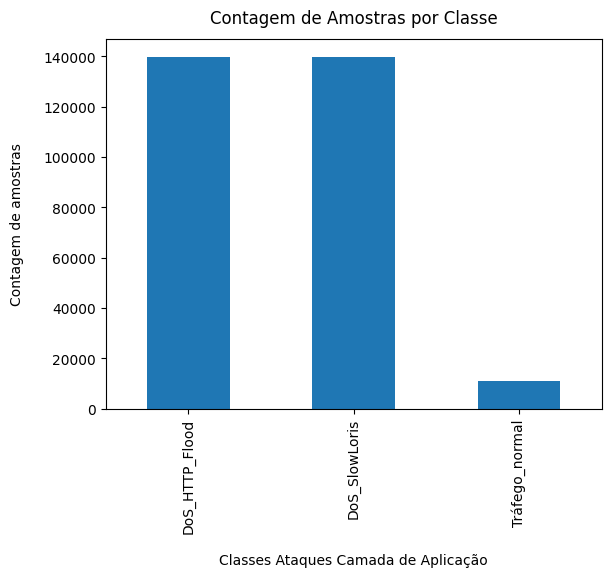

In [ ]:
names = ['Tráfego_normal','DoS_SlowLoris', 'DoS_HTTP_Flood']
classes_show = [names[i - 1] for i in data['Label'].unique()]
index = np.arange(len(classes_show))


df_visualization = data.copy()
df_visualization['Label'] = df_visualization['Label'].apply(lambda x:classes_show[x] )
df_visualization['Label'].value_counts().plot.bar(x = 'count', y = 'Label' )

plt.xlabel("Classes Ataques Camada de Aplicação", labelpad=14)
plt.ylabel("Contagem de amostras", labelpad=14)
plt.title("Contagem de Amostras por Classe", y=1.02)

In [ ]:
y = data['Label']
x = data.drop(['Label'],axis=1)
x.head()

,Dst Port,Flow Duration,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,...,URG Flag Cnt_j20_mean,URG Flag Cnt_j30,URG Flag Cnt_j30_mean,URG Flag Cnt_j40,URG Flag Cnt_j40_mean,URG Flag Cnt_j50,URG Flag Cnt_j50_mean,Bwd IAT Mean_holder_j5,Fwd Seg Size Min_holder_j5,Active Min_holder_j5
0,36244.0,4434498.0,366.0,183.000000,211.310199,5.543122e+05,1.448077e+06,4132523.0,6.0,4434498.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59916.0,4367395.0,298.0,149.000000,172.050380,5.459244e+05,1.409868e+06,4028928.0,7.0,4367395.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,443.0,118097840.0,1460.0,716.333333,693.415926,3.374224e+06,1.383123e+07,58904116.0,1.0,118097840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,59752.0,4555174.0,321.0,107.000000,185.329436,6.507391e+05,1.651876e+06,4395670.0,6.0,4555174.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37878.0,43546.0,0.0,0.000000,0.000000,1.451533e+04,1.405737e+04,28104.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
dt_null = x.isnull().sum()
dt_null

,0
Dst Port,0
Flow Duration,0
Bwd Pkt Len Max,0
Bwd Pkt Len Mean,0
Bwd Pkt Len Std,0
...,...
URG Flag Cnt_j50,0
URG Flag Cnt_j50_mean,0
Bwd IAT Mean_holder_j5,0
Fwd Seg Size Min_holder_j5,0


In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model # É o mesmo que tf.keras.models.load_model
import os

In [ ]:
mlp_path = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_mlp.joblib'
svm_path = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_svm.joblib'
nb_path = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_nb.joblib'
dt_path = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_dt.joblib'
rf_path = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_rf.joblib'
adb_path = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_adb.joblib'
modelLSTM = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_lstm.h5'
model_gru = '/poseiddon/GROUP B/CONFIGURATION 4/CICIDS2017_gru.h5'

mlp = joblib.load(mlp_path)
svm = joblib.load(svm_path)
nb = joblib.load(nb_path)
dt = joblib.load(dt_path)
rf = joblib.load(rf_path)
adb = joblib.load(adb_path)
try:
    lstm = load_model(modelLSTM)
    print("Modelo LSTM carregado com sucesso do arquivo .h5!")
    lstm.summary()
except Exception as e:
    print(f"Erro ao carregar o modelo .h5: {e}")

try:
    gru = load_model(model_gru)
    print("Modelo LSTM carregado com sucesso do arquivo .h5!")
    gru.summary()
except Exception as e:
    print(f"Erro ao carregar o modelo .h5: {e}")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 100, 256)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 100, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 100, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,605 (975.02 KB)

 Trainable params: 248,451 (970.51 KB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 2 (12.00 B)

Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                    │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,757 (229.52 KB)

 Trainable params: 58,755 (229.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
modelMLP = mlp
svm = svm
nb = nb
modelDT = dt
modelRF = rf
adb = adb

In [31]:
predictsMLP = mlp.predict(x)
predictsSVM = svm.predict(x)
predictsNB = nb.predict(x)
predictsDT = dt.predict(x)
predictsRF = rf.predict(x)
predictsADB = adb.predict(x)
predictLSTM = lstm.predict(x)
predictGRU = gru.predict(x)

9087/9087 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
9087/9087 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step


In [32]:
accuracyMLP = accuracy_score(y, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.15765037658630532

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9345    0.3274    0.4849    139890
           1     0.0000    0.0000    0.0000     10990
           2     0.0005    0.0003    0.0004    139890

    accuracy                         0.1577    290770
   macro avg     0.3117    0.1092    0.1618    290770
weighted avg     0.4498    0.1577    0.2335    290770



In [33]:
y_test = y

In [34]:
x_test = x

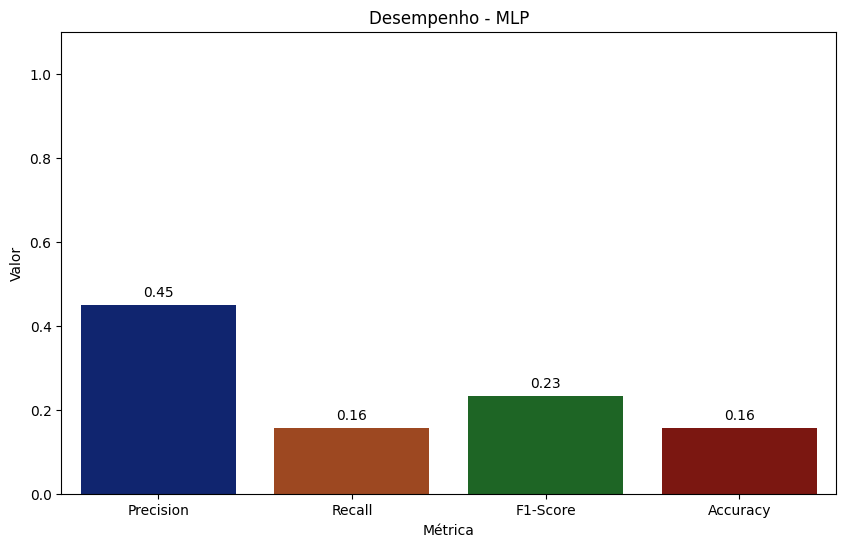

In [ ]:
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [36]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt # Importe para customizar o gráfico
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

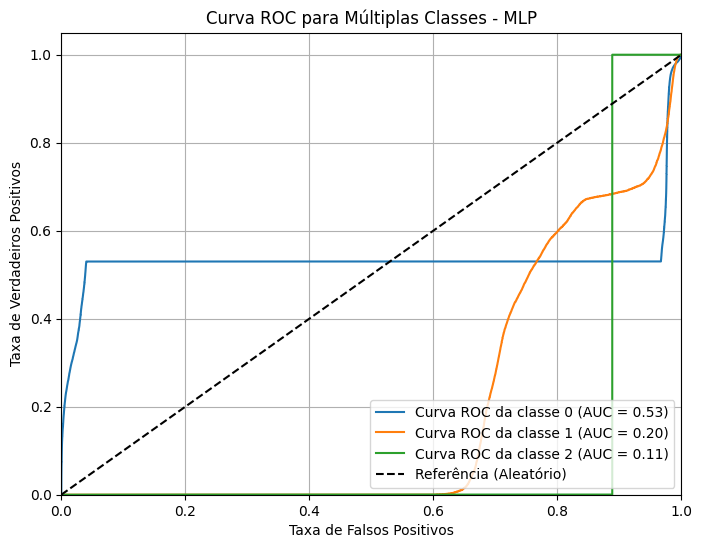

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# 3. Calcule a Curva ROC e a área AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [38]:
classes = class_names

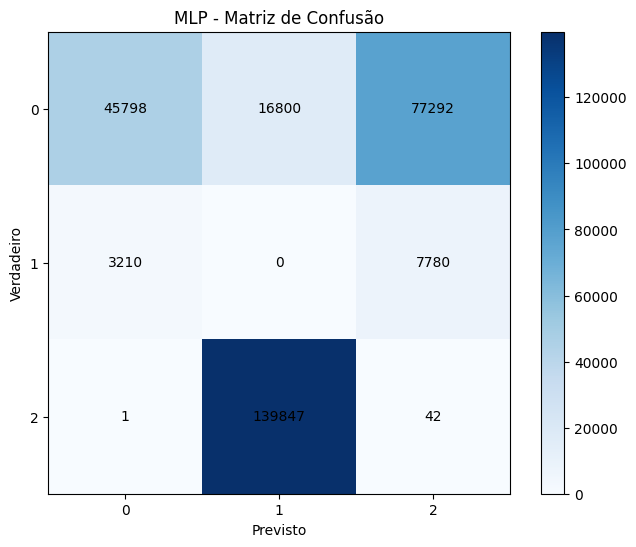

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

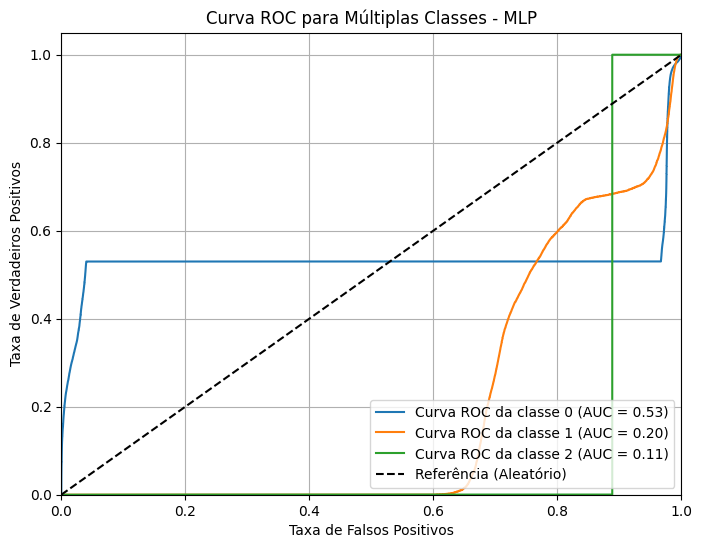

In [ ]:
class_names_mlp = mlp.classes_
y_test_bin = label_binarize(y, classes=class_names_mlp)
n_classes = y_test_bin.shape[1]
y_pred_prob = mlp.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_mlp[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

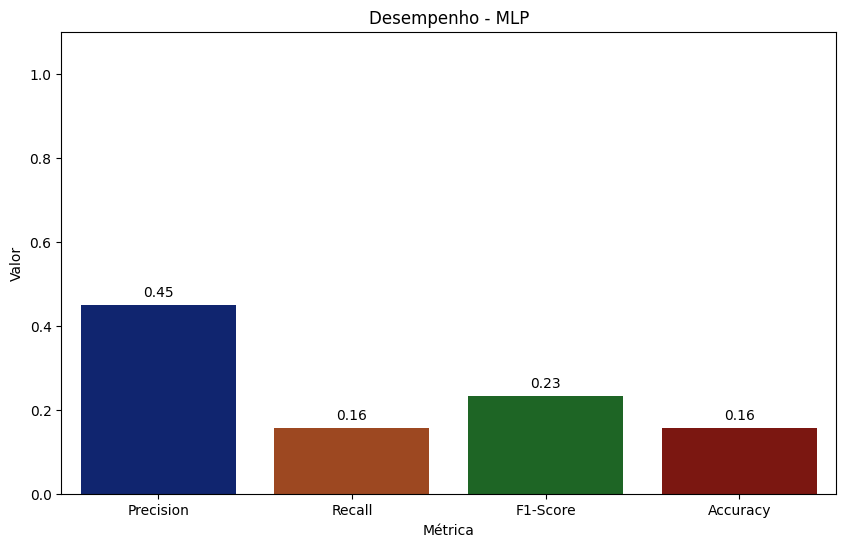

In [ ]:
y_pred = predictsMLP
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

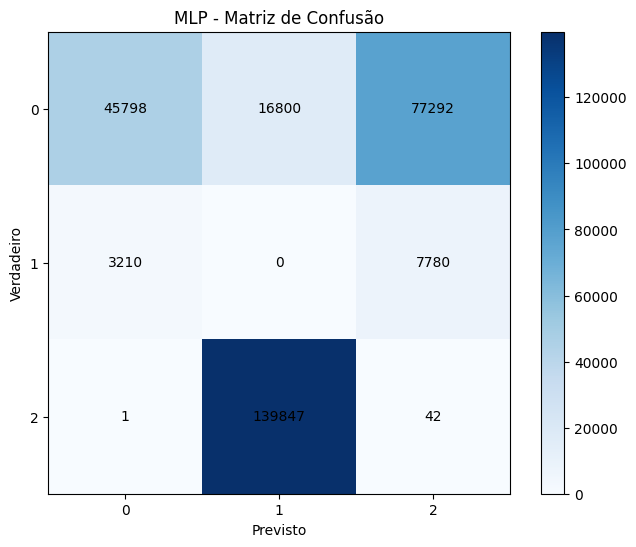

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_mlp)):
    for j in range(len(class_names_mlp)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(class_names_mlp)), labels=class_names_mlp)
plt.yticks(ticks=np.arange(len(class_names_mlp)), labels=class_names_mlp)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

print(classification_report(y, predictsADB))

accuracyadb = accuracy_score(y, predictsADB)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')
reportadb = classification_report(y, predictsADB, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       0.32      0.46      0.38    139890
           1       0.13      1.00      0.23     10990
           2       0.00      0.00      0.00    139890

    accuracy                           0.26    290770
   macro avg       0.15      0.49      0.20    290770
weighted avg       0.16      0.26      0.19    290770

Precisão do modelo de AdaBoost: 0.2614609485160092

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.3174    0.4649    0.3772    139890
           1     0.1280    0.9997    0.2269     10990
           2     0.0000    0.0000    0.0000    139890

    accuracy                         0.2615    290770
   macro avg     0.1485    0.4882    0.2014    290770
weighted avg     0.1575    0.2615    0.1901    290770



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packag

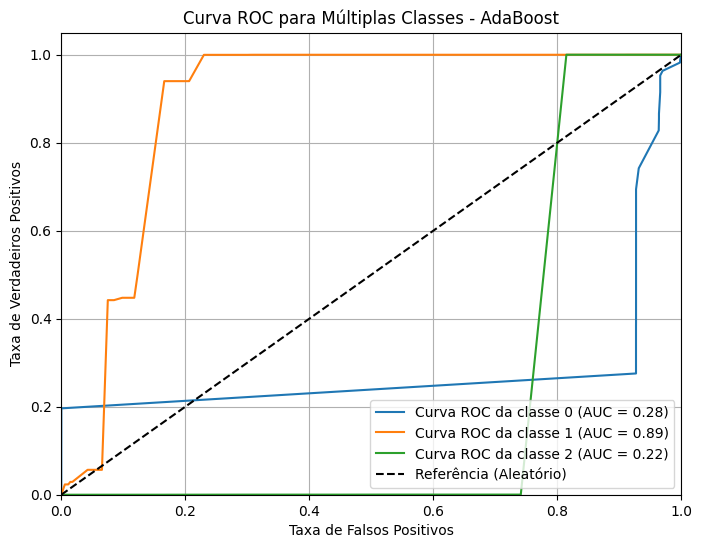

In [ ]:
class_names_adb = adb.classes_
y_test_bin = label_binarize(y, classes=class_names_adb)
n_classes = y_test_bin.shape[1]
y_pred_prob = adb.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_adb[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


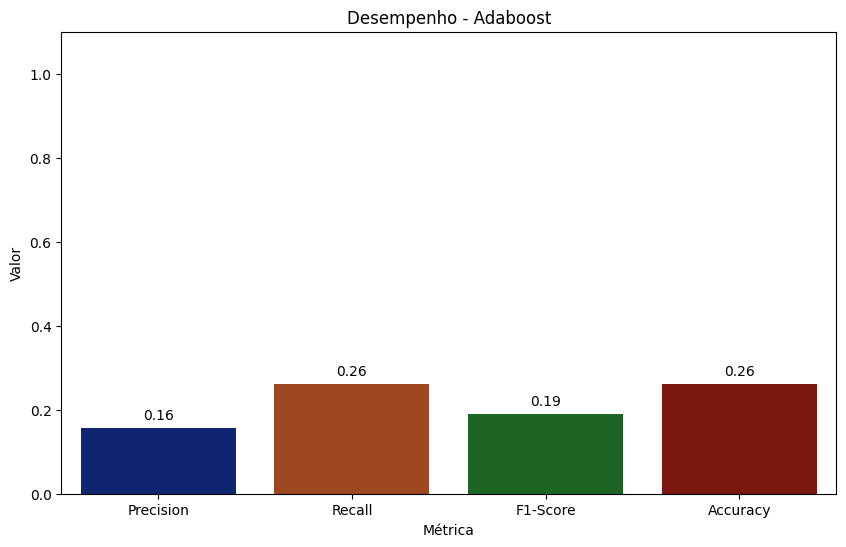

In [ ]:
y_pred = predictsADB
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Adaboost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

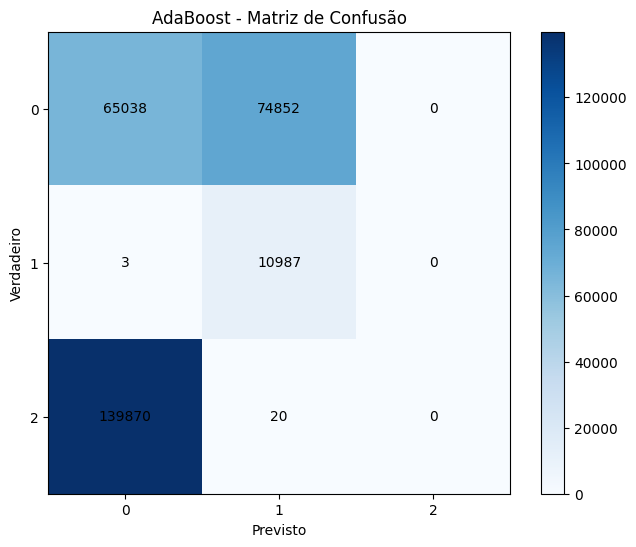

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_adb)):
    for j in range(len(class_names_adb)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_adb)), labels=class_names_adb)
plt.yticks(ticks=np.arange(len(class_names_adb)), labels=class_names_adb)
plt.show()

In [48]:
accuracySVM = accuracy_score(y, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.29197647625270834

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.3606    0.6066    0.4523    139890
           1     0.0000    0.0000    0.0000     10990
           2     0.0007    0.0002    0.0004    139890

    accuracy                         0.2920    290770
   macro avg     0.1204    0.2023    0.1509    290770
weighted avg     0.1738    0.2920    0.2178    290770



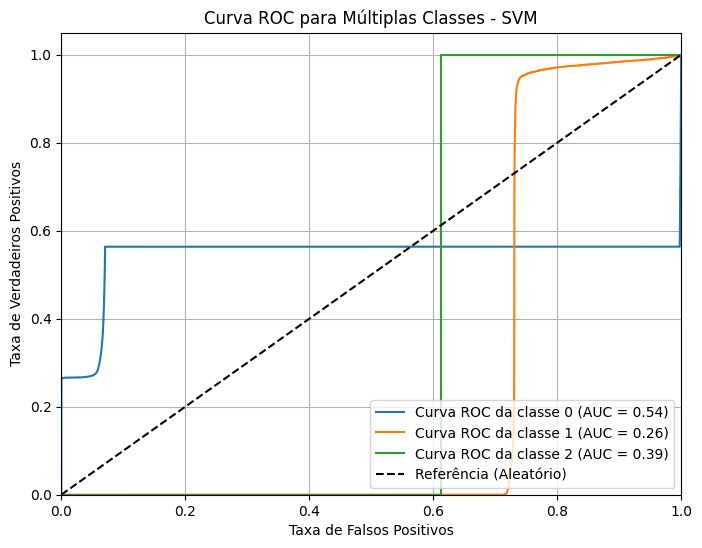

In [ ]:
class_names_svm = svm.classes_
y_test_bin = label_binarize(y, classes=class_names_svm)
n_classes = y_test_bin.shape[1]
y_pred_prob = svm.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_svm[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

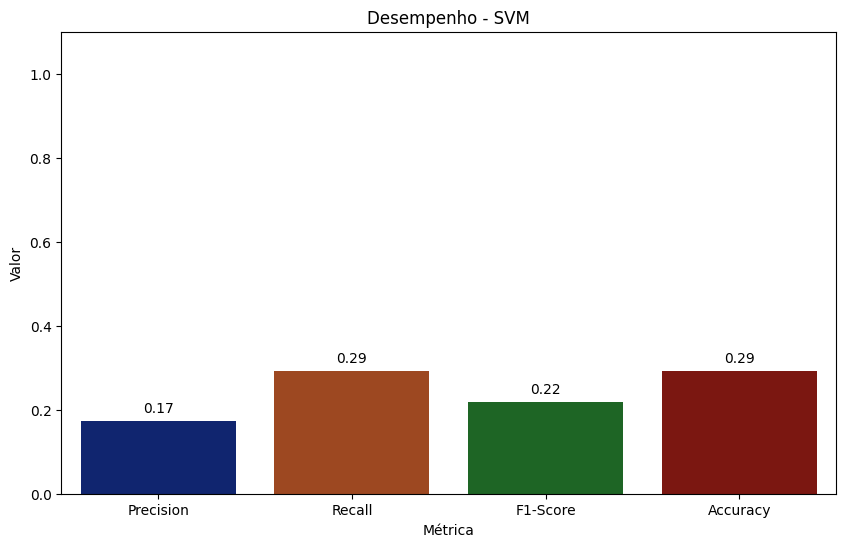

In [ ]:
y_pred = predictsSVM
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

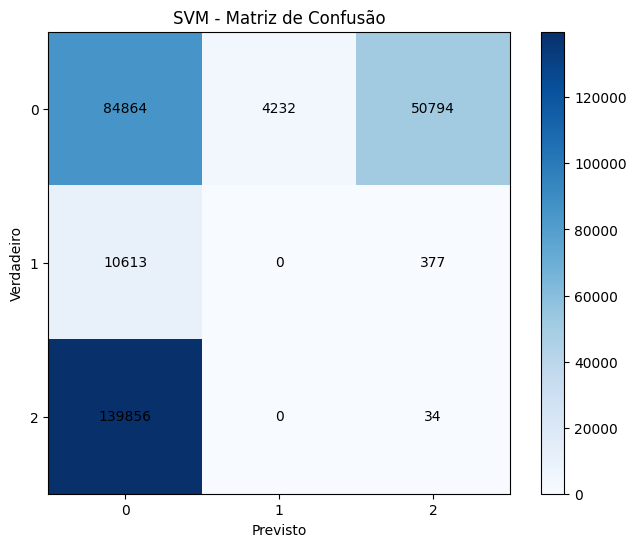

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_svm)):
    for j in range(len(class_names_svm)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(class_names_svm)), labels=class_names_svm)
plt.yticks(ticks=np.arange(len(class_names_svm)), labels=class_names_svm)
plt.show()

In [52]:
accuracyRF = accuracy_score(y, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.4554871547958868

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.4846    0.9467    0.6411    139890
           1     0.0000    0.0000    0.0000     10990
           2     0.0006    0.0001    0.0001    139890

    accuracy                         0.4555    290770
   macro avg     0.1617    0.3156    0.2137    290770
weighted avg     0.2334    0.4555    0.3085    290770



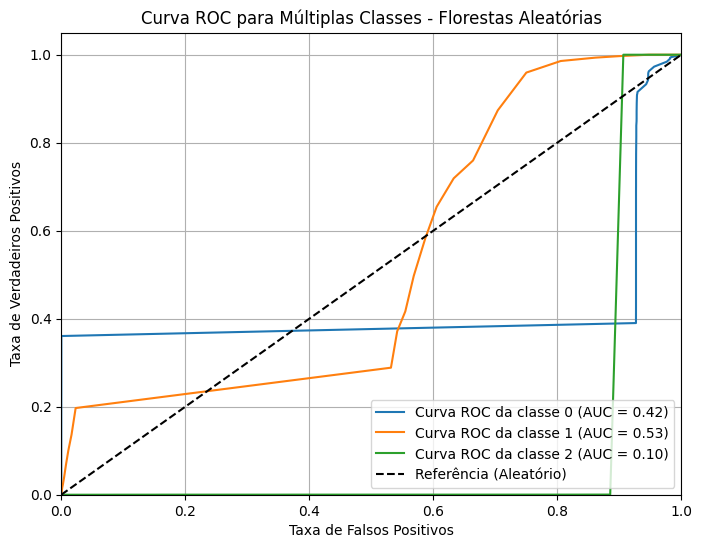

In [ ]:
class_names_rf = rf.classes_
y_test_bin = label_binarize(y, classes=class_names_rf)
n_classes = y_test_bin.shape[1]
y_pred_prob = rf.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_rf[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

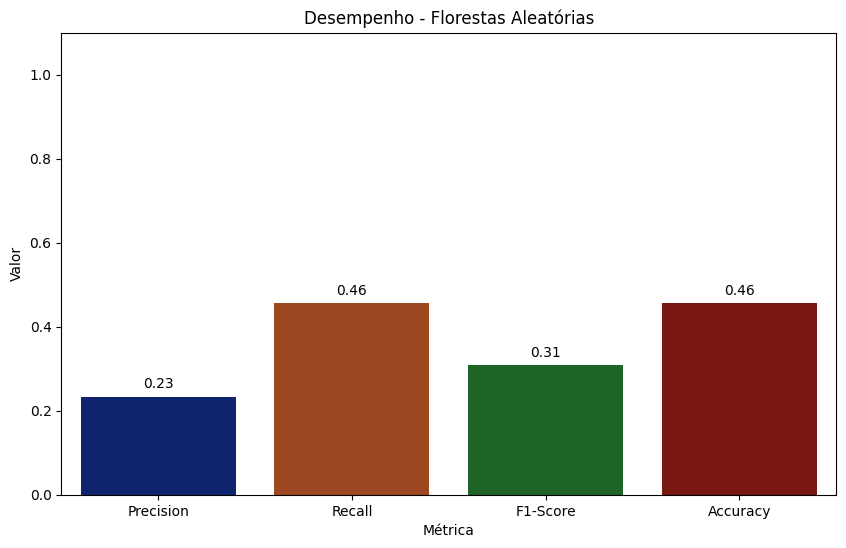

In [ ]:
y_pred = predictsRF
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Florestas Aleatórias')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

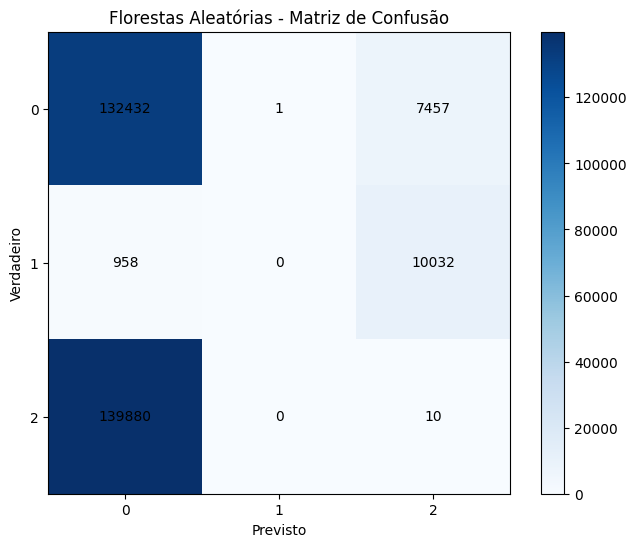

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_rf)):
    for j in range(len(class_names_rf)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Florestas Aleatórias - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_rf)), labels=class_names_rf)
plt.yticks(ticks=np.arange(len(class_names_rf)), labels=class_names_rf)
plt.show()

In [56]:
accuracyDT = accuracy_score(y, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.19453863878666988

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8787    0.3776    0.5282    139890
           1     0.0162    0.3406    0.0310     10990
           2     0.0000    0.0000    0.0000    139890

    accuracy                         0.1945    290770
   macro avg     0.2983    0.2394    0.1864    290770
weighted avg     0.4234    0.1945    0.2553    290770



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


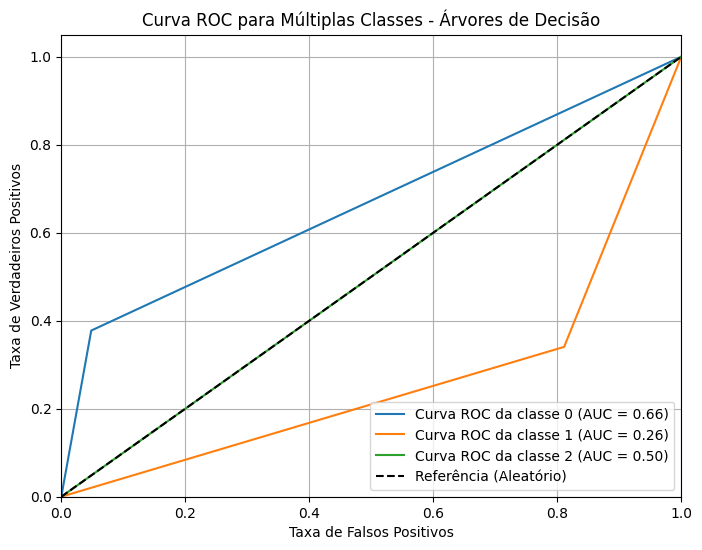

In [ ]:
class_names_dt = dt.classes_
y_test_bin = label_binarize(y, classes=class_names_dt)
n_classes = y_test_bin.shape[1]
y_pred_prob = dt.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_dt[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Árvores de Decisão')
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


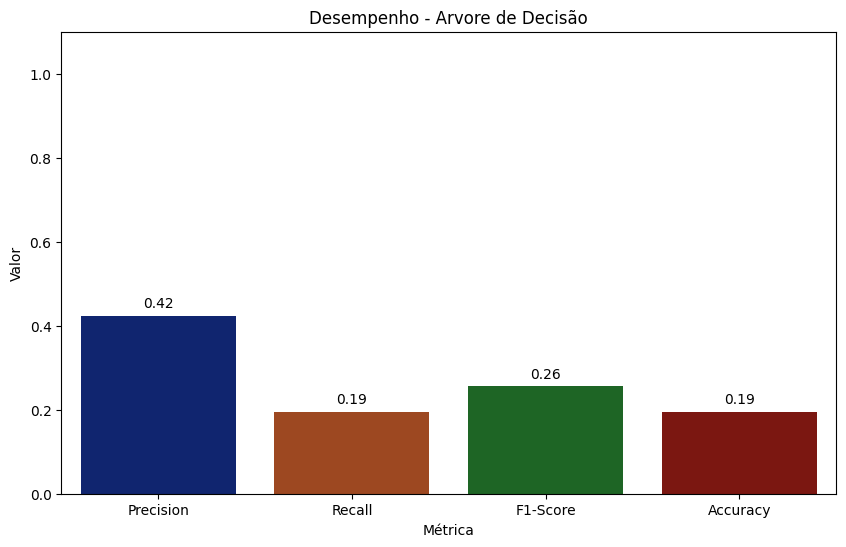

In [ ]:
y_pred = predictsDT
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

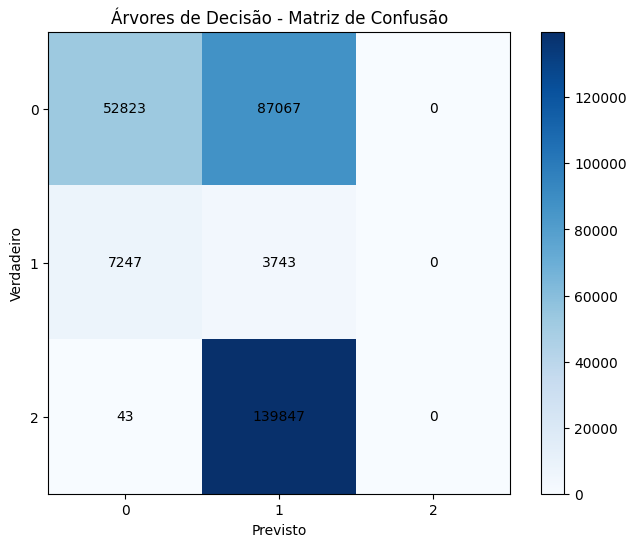

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_dt)):
    for j in range(len(class_names_dt)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(class_names_dt)), labels=class_names_dt)
plt.yticks(ticks=np.arange(len(class_names_dt)), labels=class_names_dt)
plt.show()

In [60]:
accuracyNB = accuracy_score(y, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.4811019018468205

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.4811    1.0000    0.6497    139890
           1     0.0000    0.0000    0.0000     10990
           2     0.0000    0.0000    0.0000    139890

    accuracy                         0.4811    290770
   macro avg     0.1604    0.3333    0.2166    290770
weighted avg     0.2315    0.4811    0.3125    290770



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


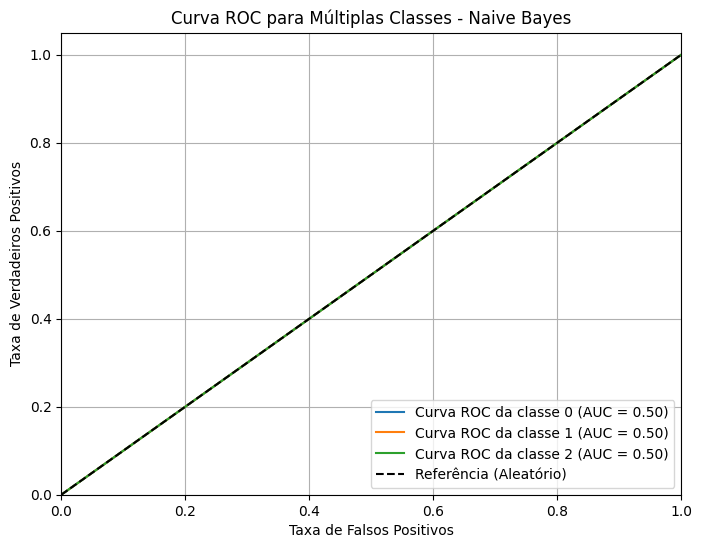

In [ ]:
class_names_nb = nb.classes_
y_test_bin = label_binarize(y, classes=class_names_nb)
n_classes = y_test_bin.shape[1]
y_pred_prob = nb.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_nb[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


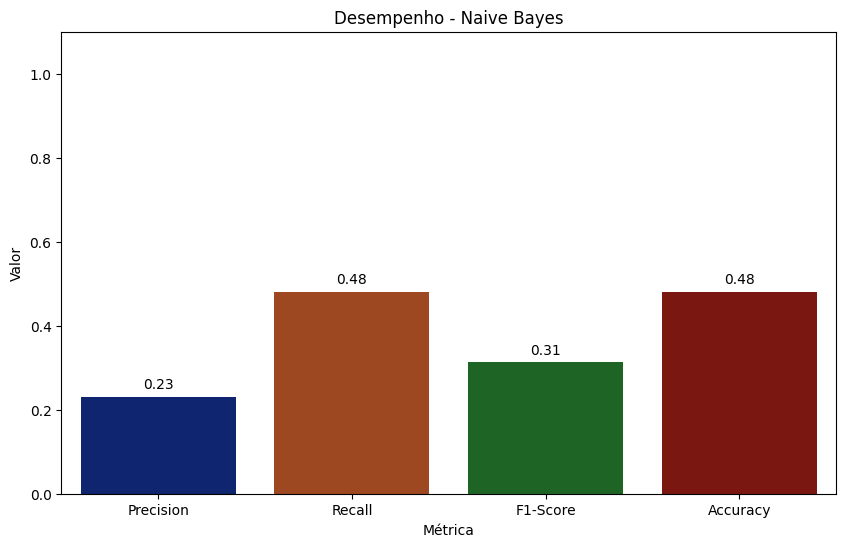

In [ ]:
y_pred = predictsNB
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

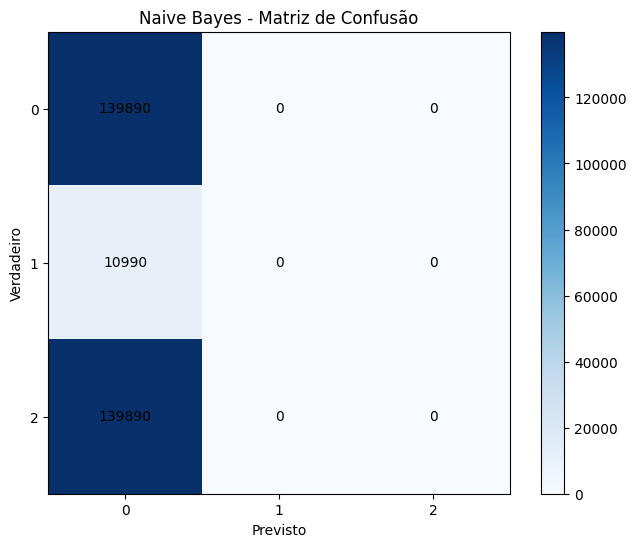

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_nb)):
    for j in range(len(class_names_nb)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_nb)), labels=class_names_nb)
plt.yticks(ticks=np.arange(len(class_names_nb)), labels=class_names_nb)
plt.show()

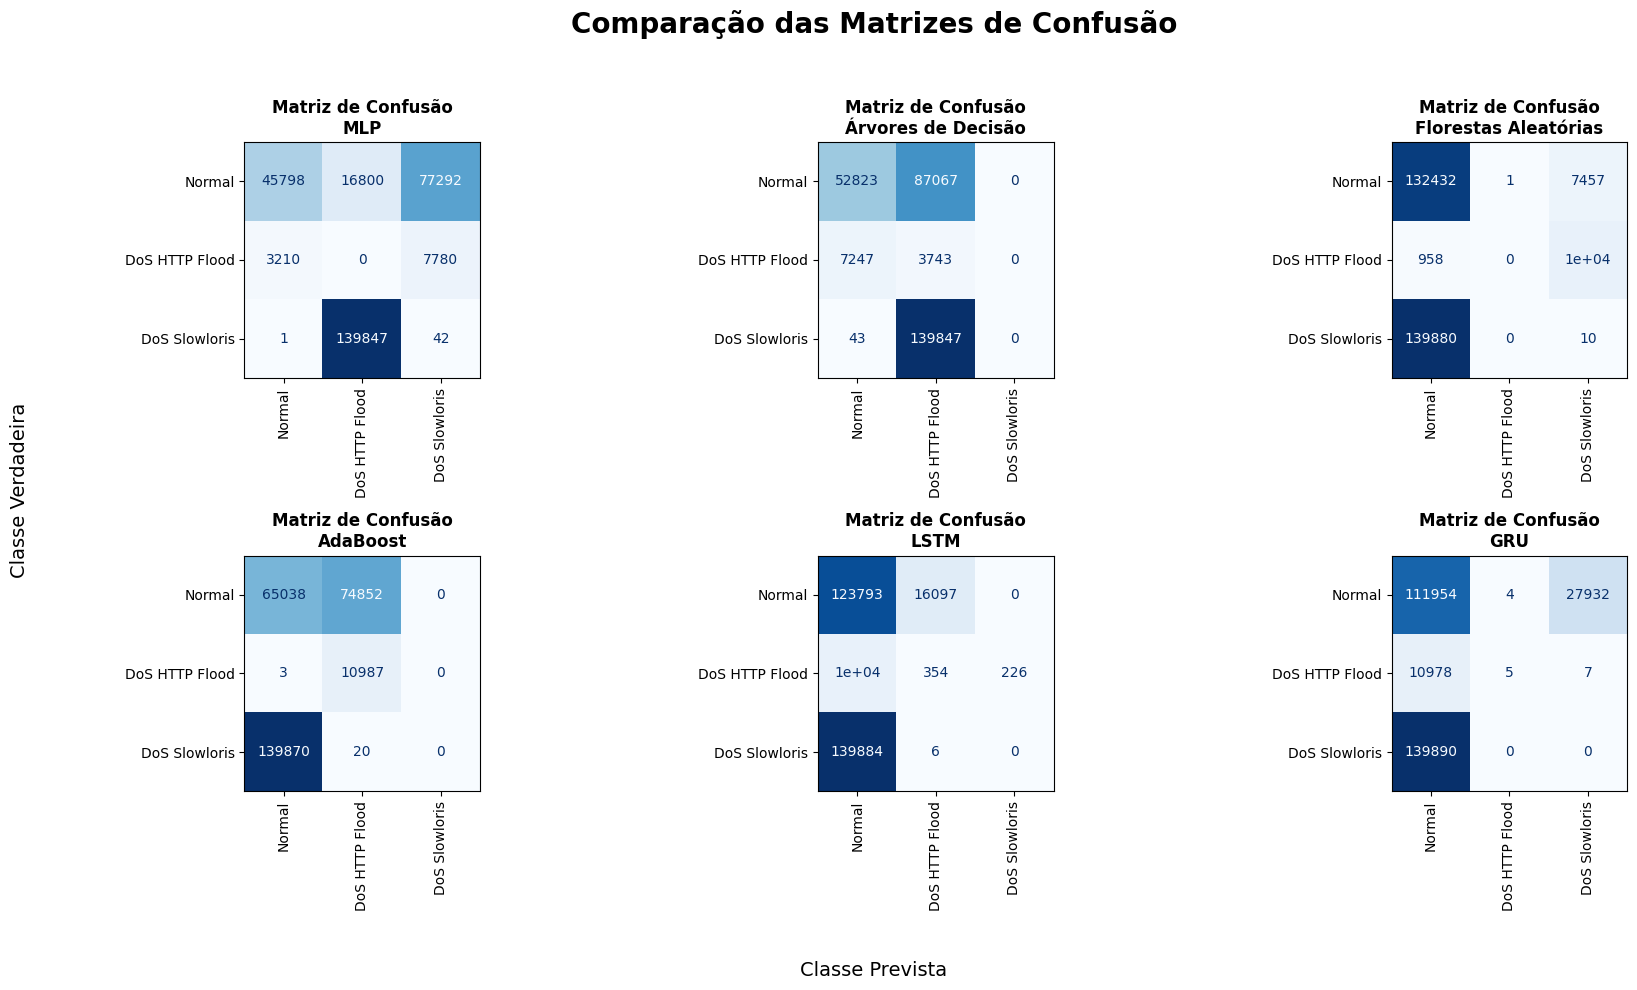

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "MLP": mlp,
    "Árvores de Decisão": dt,
    "Florestas Aleatórias": rf,
    "AdaBoost": adb,
    "LSTM": lstm, 
    "GRU": gru    
}

nomes_classes = ['Normal', 'DoS HTTP Flood', 'DoS Slowloris']
unique_labels = sorted(y.unique())

predicoes = {}
for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_proba = modelo.predict(x, verbose=0)
        predicoes[nome] = np.argmax(y_pred_proba, axis=1)
    else:
        predicoes[nome] = modelo.predict(x)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))


for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):

    cm = confusion_matrix(y, predicoes[nome_modelo], labels=unique_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')
    ax.set_title(f"Matriz de Confusão\n{nome_modelo}", fontweight='bold')

    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Classe Prevista', fontsize=14)
fig.supylabel('Classe Verdadeira', fontsize=14)

plt.suptitle("Comparação das Matrizes de Confusão", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparacao_matrizes_confusao.png') 
plt.show()

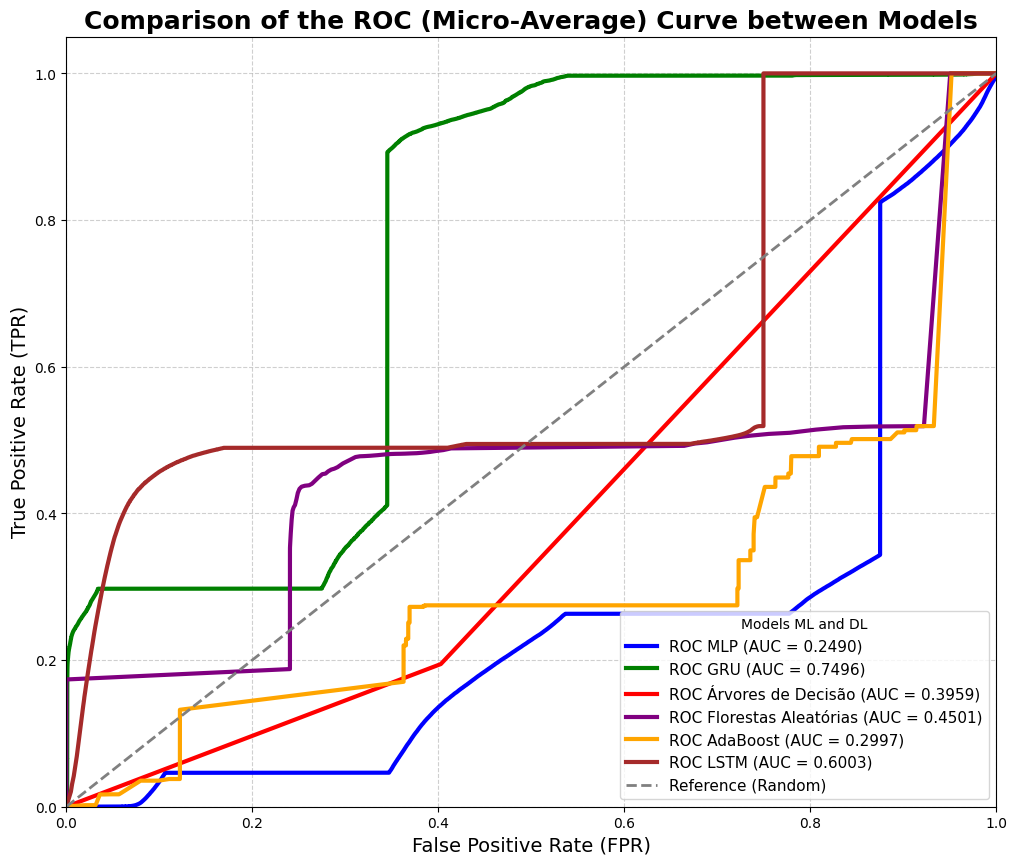

In [ ]:
x_test_sklearn = x
x_test_lstm = x
y_test_reais = y_test 

class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)
n_classes = len(class_names)

modelos = {
    "MLP": modelMLP,
    "GRU": gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": lstm,
}

plt.figure(figsize=(12, 10))
cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']


for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        print(f"Aviso: O modelo {nome_modelo} foi ignorado (sem método de probabilidades).")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)],
        lw=3,
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})'
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/tmp/ipython-input-972812353.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)
/tmp/ipython-input-972812353.py:83: FutureW

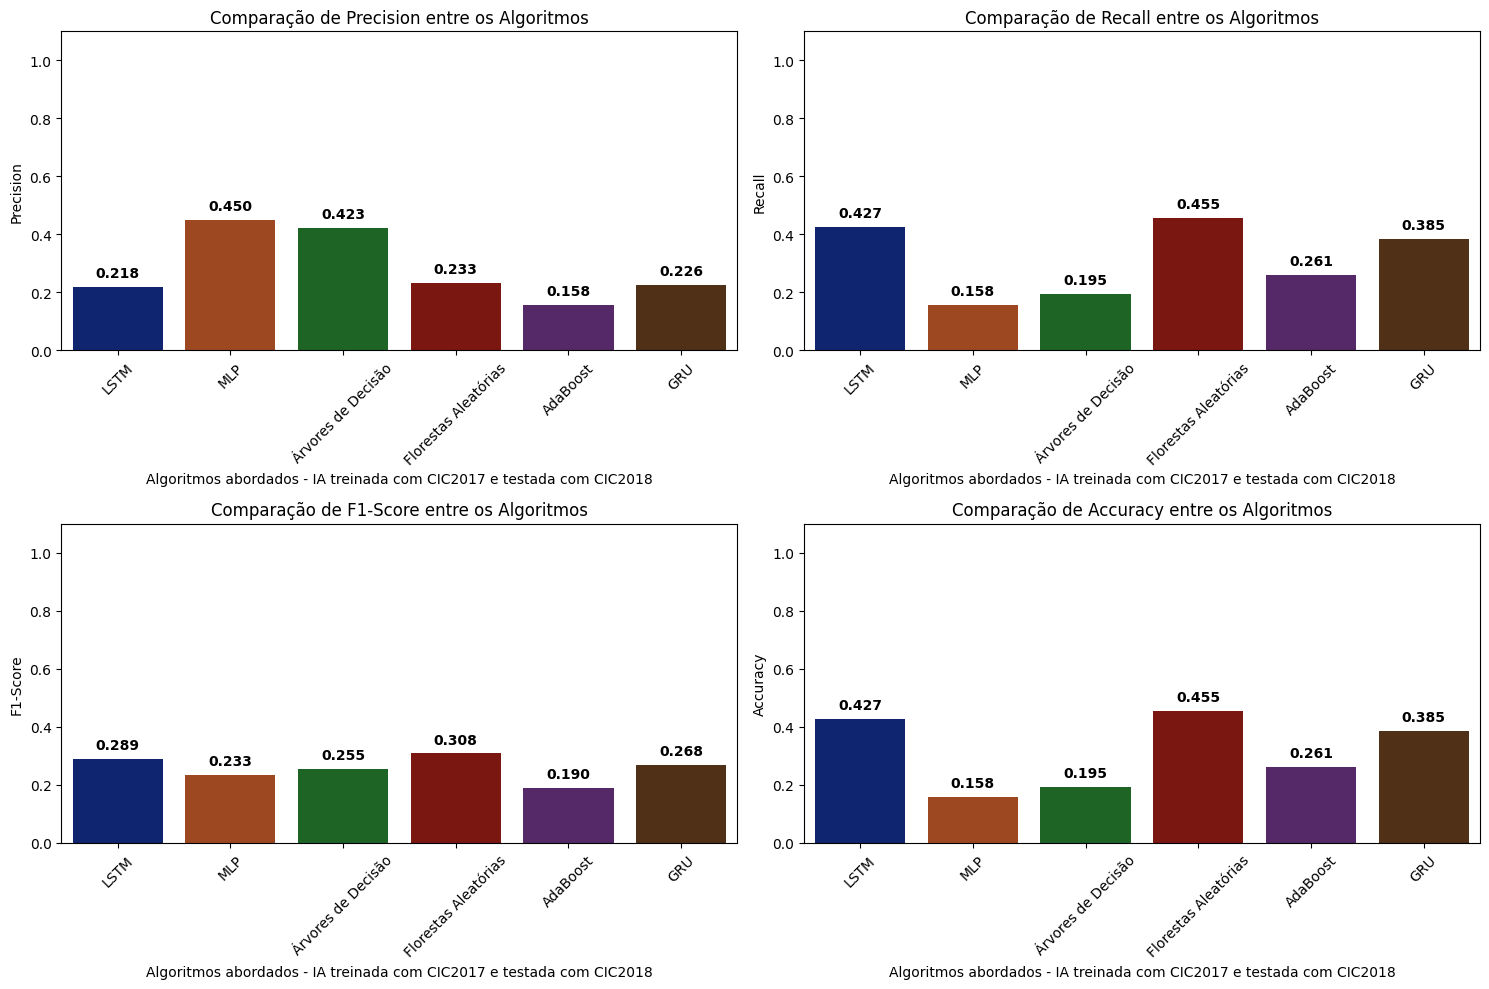

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.stats import sem, t

if predictLSTM.ndim > 1 and predictLSTM.shape[1] > 1:
    predictLSTM_labels = np.argmax(predictLSTM, axis=1)
else:
    predictLSTM_labels = predictLSTM

if predictGRU.ndim > 1 and predictGRU.shape[1] > 1:
    predictGRU_labels = np.argmax(predictGRU, axis=1)
else:
    predictGRU_labels = predictGRU

resultados = {
    "Algoritmo": ["LSTM", "MLP", "Árvores de Decisão", "Florestas Aleatórias", "AdaBoost", "GRU"],
    "Precision": [precision_score(y, predictLSTM_labels, average='weighted'), 
                  precision_score(y, predictsMLP, average='weighted'),
                  precision_score(y, predictsDT, average='weighted'),
                  precision_score(y, predictsRF, average='weighted'),
                  precision_score(y, predictsADB, average='weighted'),
                  precision_score(y, predictGRU_labels, average='weighted')], 
    "Recall": [recall_score(y, predictLSTM_labels, average='weighted'),
               recall_score(y, predictsMLP, average='weighted'),
               recall_score(y, predictsDT, average='weighted'),
               recall_score(y, predictsRF, average='weighted'),
               recall_score(y, predictsADB, average='weighted'),
               recall_score(y, predictGRU_labels, average='weighted')],
    "F1-Score": [f1_score(y, predictLSTM_labels, average='weighted'),
                 f1_score(y, predictsMLP, average='weighted'),
                 f1_score(y, predictsDT, average='weighted'),
                 f1_score(y, predictsRF, average='weighted'),
                 f1_score(y, predictsADB, average='weighted'),
                 f1_score(y, predictGRU_labels, average='weighted')],
    "Accuracy": [accuracy_score(y, predictLSTM_labels),
                 accuracy_score(y, predictsMLP),
                 accuracy_score(y, predictsDT),
                 accuracy_score(y, predictsRF),
                 accuracy_score(y, predictsADB),
                 accuracy_score(y, predictGRU_labels)]
}

df_resultados = pd.DataFrame(resultados)

df_resultados = pd.DataFrame(resultados)

def calcular_intervalo_confianca(dados):
    n = len(dados)
    if n < 2:
        return 0  
    erro_padrao = sem(dados)
    t_critico = t.ppf(0.975, n - 1)  
    intervalo = t_critico * erro_padrao
    return intervalo

metricas = ["Precision", "Recall", "F1-Score", "Accuracy"]

plt.figure(figsize=(15, 10))

for i, metrica in enumerate(metricas, 1):
    plt.subplot(2, 2, i)

    ic_95 = np.array([calcular_intervalo_confianca(df_resultados[metrica]) for _ in range(len(df_resultados))])

    ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)

    for j, p in enumerate(ax.patches):
        valor = p.get_height()

        ax.annotate(f'{valor:.3f}',
                    (p.get_x() + p.get_width() / 2., valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')

    plt.title(f"Comparação de {metrica} entre os Algoritmos")
    plt.ylim(0, 1.1)
    plt.xlabel("Algoritmos abordados - IA treinada com CIC2017 e testada com CIC2018")
    plt.ylabel(metrica)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import time

def calcular_tempo_inferencia(modelo, dados_para_teste):
  modelo.predict(dados_para_teste[:1])

  tempos = []
  for _ in range(100): 
      inicio = time.perf_counter()
      modelo.predict(dados_para_teste)
      fim = time.perf_counter()
      tempos.append(fim - inicio)

  tempo_medio_lote_ms = np.mean(tempos) * 1000
  tempo_por_previsao_ms = tempo_medio_lote_ms / len(dados_para_teste)

  return tempo_por_previsao_ms

In [ ]:
from tqdm.notebook import tqdm # Ou from tqdm import tqdm

dicionario_modelos = {
    "MLP": modelMLP,
    "GRU": gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": lstm,
}


amostra_para_teste = x[:1000]

tempos_resultados = {}

for nome_modelo, objeto_modelo in tqdm(dicionario_modelos.items()):
    print(f"Calculando tempo para o modelo: {nome_modelo}...")

    tempo_ms = calcular_tempo_inferencia(objeto_modelo, amostra_para_teste)

    tempos_resultados[nome_modelo] = tempo_ms

    print(f"-> Tempo por previsão: {tempo_ms:.6f} ms\n")

print("\n--- Dicionário Final com os Tempos de Inferência ---")
print(tempos_resultados)

  0%|          | 0/6 [00:00<?, ?it/s]

Calculando tempo para o modelo: MLP...
-> Tempo por previsão: 0.002527 ms

Calculando tempo para o modelo: GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
df_tempos = pd.DataFrame(list(tempos_resultados.items()), columns=['Model', 'Model Inference (ms)'])
df_tempos = df_tempos.sort_values(by='Model Inference (ms)', ascending=True)

In [ ]:
df_tempos.to_csv('/poseiddon/GROUP B/CONFIGURATION 4/tempos_deteccao_cic2018.csv', index=False)

/tmp/ipython-input-3464862802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


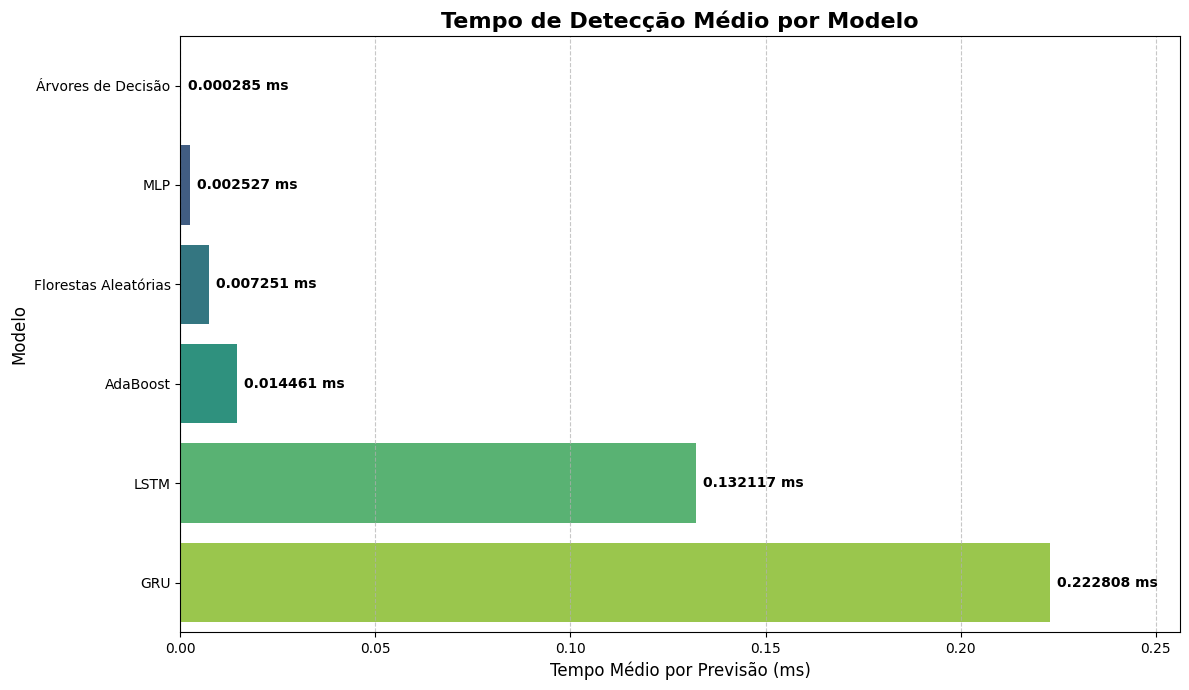

In [ ]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Model Inference (ms)',
    y='Model',
    data=df_tempos,
    palette='viridis',
    orient='h' 
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.6f} ms',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.title('Tempo de Detecção Médio por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Médio por Previsão (ms)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlim(0, df_tempos['Model Inference (ms)'].max() * 1.15)

plt.tight_layout()
plt.show()

In [73]:
df_resultados.rename(columns={'Algoritmo': 'Algorithm'}, inplace=True)
df_resultados.head()

,Algorithm,Precision,Recall,F1-Score,Accuracy
0,LSTM,0.218106,0.426959,0.288706,0.426959
1,MLP,0.449818,0.157650,0.233463,0.157650
2,Árvores de Decisão,0.423371,0.194539,0.255300,0.194539
3,Florestas Aleatórias,0.233426,0.455487,0.308481,0.455487
4,AdaBoost,0.157537,0.261461,0.190071,0.261461


In [75]:
df_times = df_tempos.copy()
df_times.head()

,Model,Model Inference (ms)
2,Árvores de Decisão,0.000285
0,MLP,0.002527
3,Florestas Aleatórias,0.007251
4,AdaBoost,0.014461
5,LSTM,0.132117


In [ ]:
nova_sequencia = ['LSTM', 'MLP', 'Árvores de Decisão', 'Florestas Aleatórias', 'AdaBoost', 'GRU']
model_category = pd.CategoricalDtype(nova_sequencia, ordered=True)
df_times['Model'] = df_times['Model'].astype(model_category)

In [ ]:
df_reordenado = df_times.sort_values('Model')
df_reordenado.head(10)

,Model,Model Inference (ms)
5,LSTM,0.132117
0,MLP,0.002527
2,Árvores de Decisão,0.000285
3,Florestas Aleatórias,0.007251
4,AdaBoost,0.014461
1,GRU,0.222808


In [78]:
df_reordenado = df_reordenado.reset_index(drop=True)
df_reordenado.head(10)

,Model,Model Inference (ms)
0,LSTM,0.132117
1,MLP,0.002527
2,Árvores de Decisão,0.000285
3,Florestas Aleatórias,0.007251
4,AdaBoost,0.014461
5,GRU,0.222808


In [79]:
data = pd.concat([df_resultados, df_reordenado['Model Inference (ms)']], axis=1)
data.head(10)

,Algorithm,Precision,Recall,F1-Score,Accuracy,Model Inference (ms)
0,LSTM,0.218106,0.426959,0.288706,0.426959,0.132117
1,MLP,0.449818,0.157650,0.233463,0.157650,0.002527
2,Árvores de Decisão,0.423371,0.194539,0.255300,0.194539,0.000285
3,Florestas Aleatórias,0.233426,0.455487,0.308481,0.455487,0.007251
4,AdaBoost,0.157537,0.261461,0.190071,0.261461,0.014461
5,GRU,0.225932,0.385043,0.267527,0.385043,0.222808


In [80]:
data.insert(0, 'Configuration', 'Configuration 4')
data.head()

,Configuration,Algorithm,Precision,Recall,F1-Score,Accuracy,Model Inference (ms)
0,Configuration 4,LSTM,0.218106,0.426959,0.288706,0.426959,0.132117
1,Configuration 4,MLP,0.449818,0.157650,0.233463,0.157650,0.002527
2,Configuration 4,Árvores de Decisão,0.423371,0.194539,0.255300,0.194539,0.000285
3,Configuration 4,Florestas Aleatórias,0.233426,0.455487,0.308481,0.455487,0.007251
4,Configuration 4,AdaBoost,0.157537,0.261461,0.190071,0.261461,0.014461


In [81]:
data.head()

,Configuration,Algorithm,Precision,Recall,F1-Score,Accuracy,Model Inference (ms)
0,Configuration 4,LSTM,0.218106,0.426959,0.288706,0.426959,0.132117
1,Configuration 4,MLP,0.449818,0.157650,0.233463,0.157650,0.002527
2,Configuration 4,Árvores de Decisão,0.423371,0.194539,0.255300,0.194539,0.000285
3,Configuration 4,Florestas Aleatórias,0.233426,0.455487,0.308481,0.455487,0.007251
4,Configuration 4,AdaBoost,0.157537,0.261461,0.190071,0.261461,0.014461


In [ ]:
data.to_csv('/poseiddon/GROUP B/CONFIGURATION 4/all_results_cic2018_conf04.csv')